In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
# load in datas
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

# merge two data frame with movieId
data = ratings.merge(movies,on='movieId')

<AxesSubplot:xlabel='rating', ylabel='Count'>

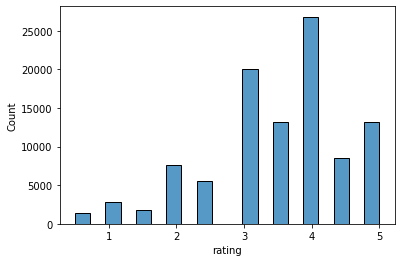

In [8]:
# histgram of rating
sns.histplot(data.rating, bins=20)

In [4]:
# Best 10 movies with most ratings in history
group_by_title = data.groupby(['title']).sum()
ratings_by_title = group_by_title.sort_values(by="rating", ascending=False)
ratings_by_title.head(10)

,userId,movieId,rating,timestamp
title,,,,
"Shawshank Redemption, The (1994)",95829,100806,1404.0,376924839127
Forrest Gump (1994),101385,117124,1370.0,386165236681
Pulp Fiction (1994),90621,90872,1288.5,349204311001
"Matrix, The (1999)",85236,714738,1165.5,350270041779
"Silence of the Lambs, The (1991)",85535,165447,1161.0,320035674330
Star Wars: Episode IV - A New Hope (1977),76484,65260,1062.0,298509531263
Braveheart (1995),73375,26070,955.5,259448308280
Fight Club (1999),69737,645062,931.5,282265436424
Schindler's List (1993),69481,115940,929.5,257743980936


In [5]:
a = ratings_by_title.head(10)
mean_ratings = data.groupby(['title']).mean() # calculate the mean of ratings
mean_ratings = mean_ratings.loc[a.index] # extract the movie names by "a.index"
mean_ratings


,userId,movieId,rating,timestamp
title,,,,
"Shawshank Redemption, The (1994)",302.299685,318.0,4.429022,1.189037e+09
Forrest Gump (1994),308.161094,356.0,4.164134,1.173755e+09
Pulp Fiction (1994),295.182410,296.0,4.197068,1.137473e+09
"Matrix, The (1999)",306.604317,2571.0,4.192446,1.259964e+09
"Silence of the Lambs, The (1991)",306.577061,593.0,4.161290,1.147081e+09
Star Wars: Episode IV - A New Hope (1977),304.717131,260.0,4.231076,1.189281e+09
Braveheart (1995),309.599156,110.0,4.031646,1.094719e+09
Fight Club (1999),319.894495,2959.0,4.272936,1.294796e+09
Schindler's List (1993),315.822727,527.0,4.225000,1.171564e+09


In [23]:
# Extracting the year from the title
movies['Year'] = movies['title'].str.extract(".*\((.*)\).*")
movies

,movieId,title,genres,Year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017
9739,193585,Flint (2017),Drama,2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),


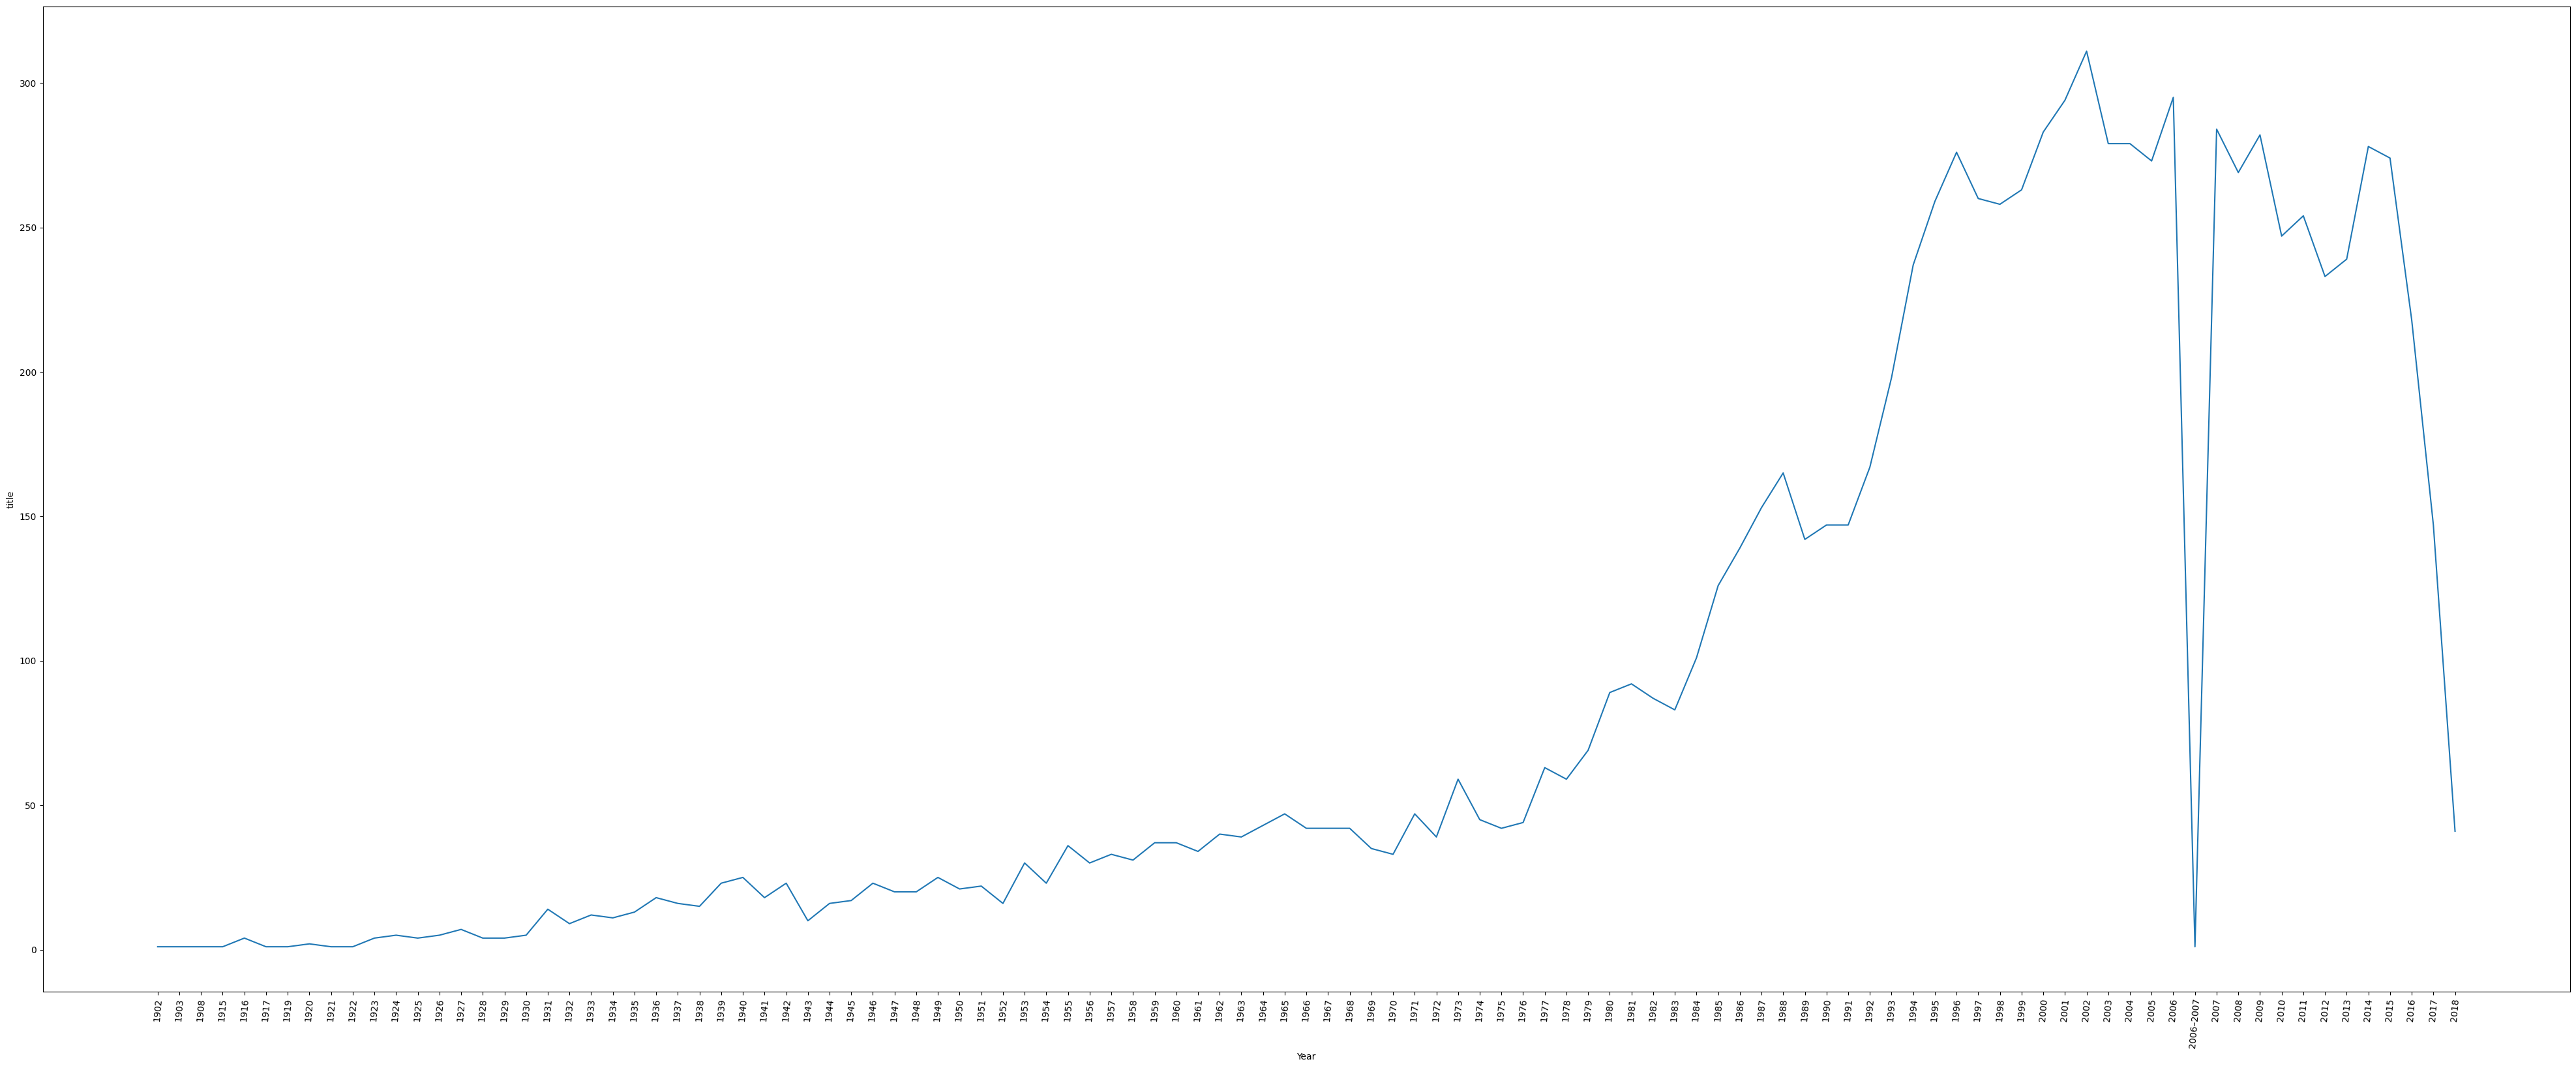

In [24]:
plt.figure(figsize=(50,20), dpi=100)
sns.lineplot(data = movies.groupby('Year').title.count())
plt.xticks(rotation=85)